### Mục lục
##### 1. Nhập dữ liệu
###### Tìm hiểu cách nhập dữ liệu vào dự án
##### 2. Trực quan hóa dữ liệu và EDA
###### Khám phá dữ liệu và hiểu rõ hơn thông qua trực quan hóa và phân tích thống kê Định nghĩa hàm Hiểu mục đích và cách sử dụng các hàm được sử dụng trong dự án Phân phối biến số Phân tích sự phân bố và đặc điểm của các biến số Phân phối biến phân loại Phân tích sự phân bố và đặc điểm của các biến phân loại Tương quan với kết quả Hiểu mối tương quan giữa các biến khác nhau và biến mục tiêu
##### 3. Mô hình và dự đoán
###### Áp dụng các mô hình học máy để đưa ra dự đoán trên dữ liệu Tìm kiếm mô hình Tìm hiểu cách tìm kiếm mô hình học máy tốt nhất cho dự án Tầm quan trọng của các tính năng Hiểu được tầm quan trọng của các tính năng khác nhau trong mô hình Lựa chọn tính năng Chọn các tính năng quan trọng nhất cho mô hình

#### Nhập dữ liệu
Bộ dữ liệu này chứa kết quả xét nghiệm công thức máu toàn phần của các cá nhân, bao gồm các chỉ số là kết quả của quá trình xét nghiệm công thức máu toàn phần. Trong tập dữ liệu này:
+ LYM (Lymphocyte – Bạch cầu Lympho): Lymphocyte là các tế bào có khả năng miễn dịch (thường từ 10% - 58.5%L).
+ NEUT (Neutrophil) - bạch cầu trung tính: Bạch cầu trung tính có chức năng quan trọng là thực bào (thường từ 37% - 80%M).
+ MON (monocyte) - bạch cầu mono: Mono bào là bạch cầu đơn nhân, sau sẽ biệt hóa thành đại thực bào (thường từ 0% - 12%M).
+ EOS (eosinophils) - bạch cầu ái toan: Bạch cầu ái toan có khả năng thực bào yếu (thường từ 0.1% - 7%E).
+ BASO (basophils) - bạch cầu ái kiềm: Có vai trò quan trọng trong các phản ứng dị ứng (thường từ 0.1% - 2.5%).
+ HBG (Hemoglobin) – Lượng huyết sắc tố trong một thể tích máu: Là một phân tử protein phức tạp có khả năng vận chuyển oxy và tạo màu đỏ cho hồng cầu (thường ở nam từ 12 - 18 g/dl, ở nữ từ 12 - 16 g/dl). 
+ HCT (Hematocrit) – Tỷ lệ thể tích hồng cầu trên thể tích máu toàn phần (thường ở nam từ 45% - 51%, ở nữ từ 37% - 48%).
+ MCV (Mean corpuscular volume) – Thể tích trung bình của một hồng cầu (thường từ 80 - 97 fl).
+ MCH (Mean Corpuscular Hemoglobin) – Lượng huyết sắc tố trung bình trong một hồng cầu(thường từ 26 - 32 picogram(pg)).
+ MCHC (Mean Corpuscular Hemoglobin Concentration) – Nồng độ trung bình của huyết sắc tố hemoglobin trong một thể tích máu(thường từ 31% - 36%).
+ RDW (Red Cell Distribution Width) – Độ phân bố kích thước hồng cầu(thường từ 11.5% - 15.5%).
+ PLT (Platelet Count) – Số lượng tiểu cầu trong một thể tích máu(thường từ 140 - 440 K/uL).
+ MPV (Mean Platelet Volume) – Thể tích trung bình của tiểu cầu trong một thể tích máu(thường từ 0.0 - 99.8 fL).
+ diseased - 0: Không thiếu máu, 1: Thiếu máu 

In [1]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Nhập dữ liệu
df = pd.read_csv("../data/CBC_data_diabetes_mellitus.csv")
df = df.iloc[:, 1:]
print(f"Shape of dataset -> {df.shape}")
print(df.info())

df.head()

Shape of dataset -> (1513, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HGB       1513 non-null   float64
 1   MCHC      1513 non-null   float64
 2   MCH       1513 non-null   float64
 3   MCV       1513 non-null   float64
 4   MPV       1513 non-null   float64
 5   RBC       1513 non-null   float64
 6   PLT       1513 non-null   float64
 7   RDW       1513 non-null   float64
 8   WBC       1513 non-null   float64
 9   diseased  1513 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 118.3 KB
None


,HGB,MCHC,MCH,MCV,MPV,RBC,PLT,RDW,WBC,diseased
0,119.0,315.0,29.3,92.9,8.5,4.07,249.0,14.9,2.98,1
1,130.0,321.0,27.2,84.8,7.0,4.76,179.0,13.1,8.66,0
2,97.0,314.0,18.7,59.7,7.8,5.17,244.0,9.9,5.61,1
3,135.0,314.0,27.3,87.0,9.1,4.96,294.0,12.8,5.46,1
4,161.0,319.0,28.3,88.8,8.7,5.68,224.0,13.7,6.04,1


Tập dữ liệu của chúng tôi bao gồm 1513 hàng và 10 cột, trong đó biến quan trọng nhất là diseased. Nó đóng vai trò như một dấu hiệu cho thấy sự hiện diện hay vắng mặt của tình trạng mắc bệnh đái tháo đường ở bệnh nhân và là trọng tâm chính của note book này. Mục tiêu của chúng tôi là xây dựng một mô hình dự đoán có thể phân loại chính xác tình trạng thiếu máu dựa trên các đặc điểm được cung cấp.

#### Trực quan hóa dữ liệu và EDA
##### Định nghĩa hàm

In [3]:
import seaborn as sns

def set_style(ax, left=True, bottom=False, axis_grid="y"):
    """
    Chức năng trợ giúp để tùy chỉnh kiểu của cốt truyện Seaborn.
    
    Tham số:
    -----------
    ax : Đối tượng trục Matplotlib
        Các trục được tạo kiểu
        
    left : bool, optional (default=True)
        Có nên loại bỏ gai trái hay không
    
    bottom : bool, optional (default=False)
        Có nên loại bỏ gai phía dưới hay không
    
    axis_grid : {'x', 'y', 'both'}, optional (default='y')
        Trục nào để thêm đường lưới vào
    
    Returns:
    --------
    None
    """
    sns.despine(ax=ax, left=left, bottom=bottom)  # Loại bỏ các gai ở bên trái và/hoặc dưới cùng của ô
    ax.grid(axis=axis_grid, linewidth=0.2, color="black")  # Thêm đường lưới vào trục được chỉ định với độ rộng và màu đường nhất định

Để đảm bảo tính nhất quán trong hình ảnh trực quan xuyên suốt sổ ghi chép, một danh sách mã màu đã được xác định. Những màu này sẽ được sử dụng trên tất cả các chế độ xem, mang lại vẻ ngoài đồng nhất và thẩm mỹ cho sổ tay.

In [4]:
# Xác định danh sách màu sắc
# Color 1: Red
# Color 2: Navy
# Color 3: Teal
colors = ["#e60026", "#001f3f", "#007f7f"]

Biểu đồ CDF cho phép chúng ta dễ dàng so sánh nhiều bản phân phối và chính xác là tuyệt vời để so sánh

In [5]:
def hist(df, x, ax, hue=None, palette=None, main_color=colors[0], second_color=colors[1]):
    
    alpha = 0.8
    if hue:
        alpha = 0.3
    
    sns.histplot(data=df, x=x, ax=ax,
                 hue=hue, palette=palette, 
                 color=main_color, linewidth=3, bins=20, alpha=alpha,
                 kde=True, line_kws={"linewidth":3, "linestyle":"--"}
                )
    ax.lines[0].set_color(second_color)
    
    ax.set_ylabel("Number of observation")
    ax.set_xlabel(x, fontsize="x-large")
    
    set_style(ax)

In [6]:
def cdf_plot(df, x, ax, hue=None, palette=None, main_color=colors[1]):
    
    sns.kdeplot(data=df, x=x, hue=hue, ax=ax, color=main_color,
                palette=palette,
                cumulative=True, warn_singular=False, linewidth=4, common_norm=False)
    
    set_style(ax)

In [7]:
def count(df, x, ax, main_color=colors[0], hue=None, palette=None):
    """
    Tạo một biểu đồ đếm của tính năng đã cho 'x' trong DataFrame 'df' được cung cấp, 
    trên trục 'ax' được cung cấp, với màu sắc và bảng màu tùy chọn.
    
    Tham số:
    -----------
    df : pandas DataFrame
        DataFrame chứa dữ liệu cần vẽ.
    x : str
        Tên cột cần vẽ trên trục x.
    ax : matplotlib Axes
        Trục để vẽ biểu đồ.
    main_color : str, optional (default=colors[0])
        Màu sắc chính được sử dụng cho biểu đồ.
    hue : str, optional (default=None)
        Tên của cột sử dụng cho tham số màu sắc.
    palette : str, optional (default=None)
        Bảng màu để sử dụng cho cốt truyện.
        
    Returns:
    --------
    None
    """
    
    sns.countplot(data=df, x=x, ax=ax, 
                  color=main_color, saturation=0.8, linewidth=3, edgecolor="black",
                  hue=hue, palette=palette)
    
    for container in ax.containers:
        ax.bar_label(container, color="black", fontsize=20)
    
    ax.set_ylabel("")
    ax.set_xlabel(x, fontsize=15)
    ax.tick_params(axis='y', which='both', left=False, right=False)
    
    set_style(ax)

##### Phân phối biến số

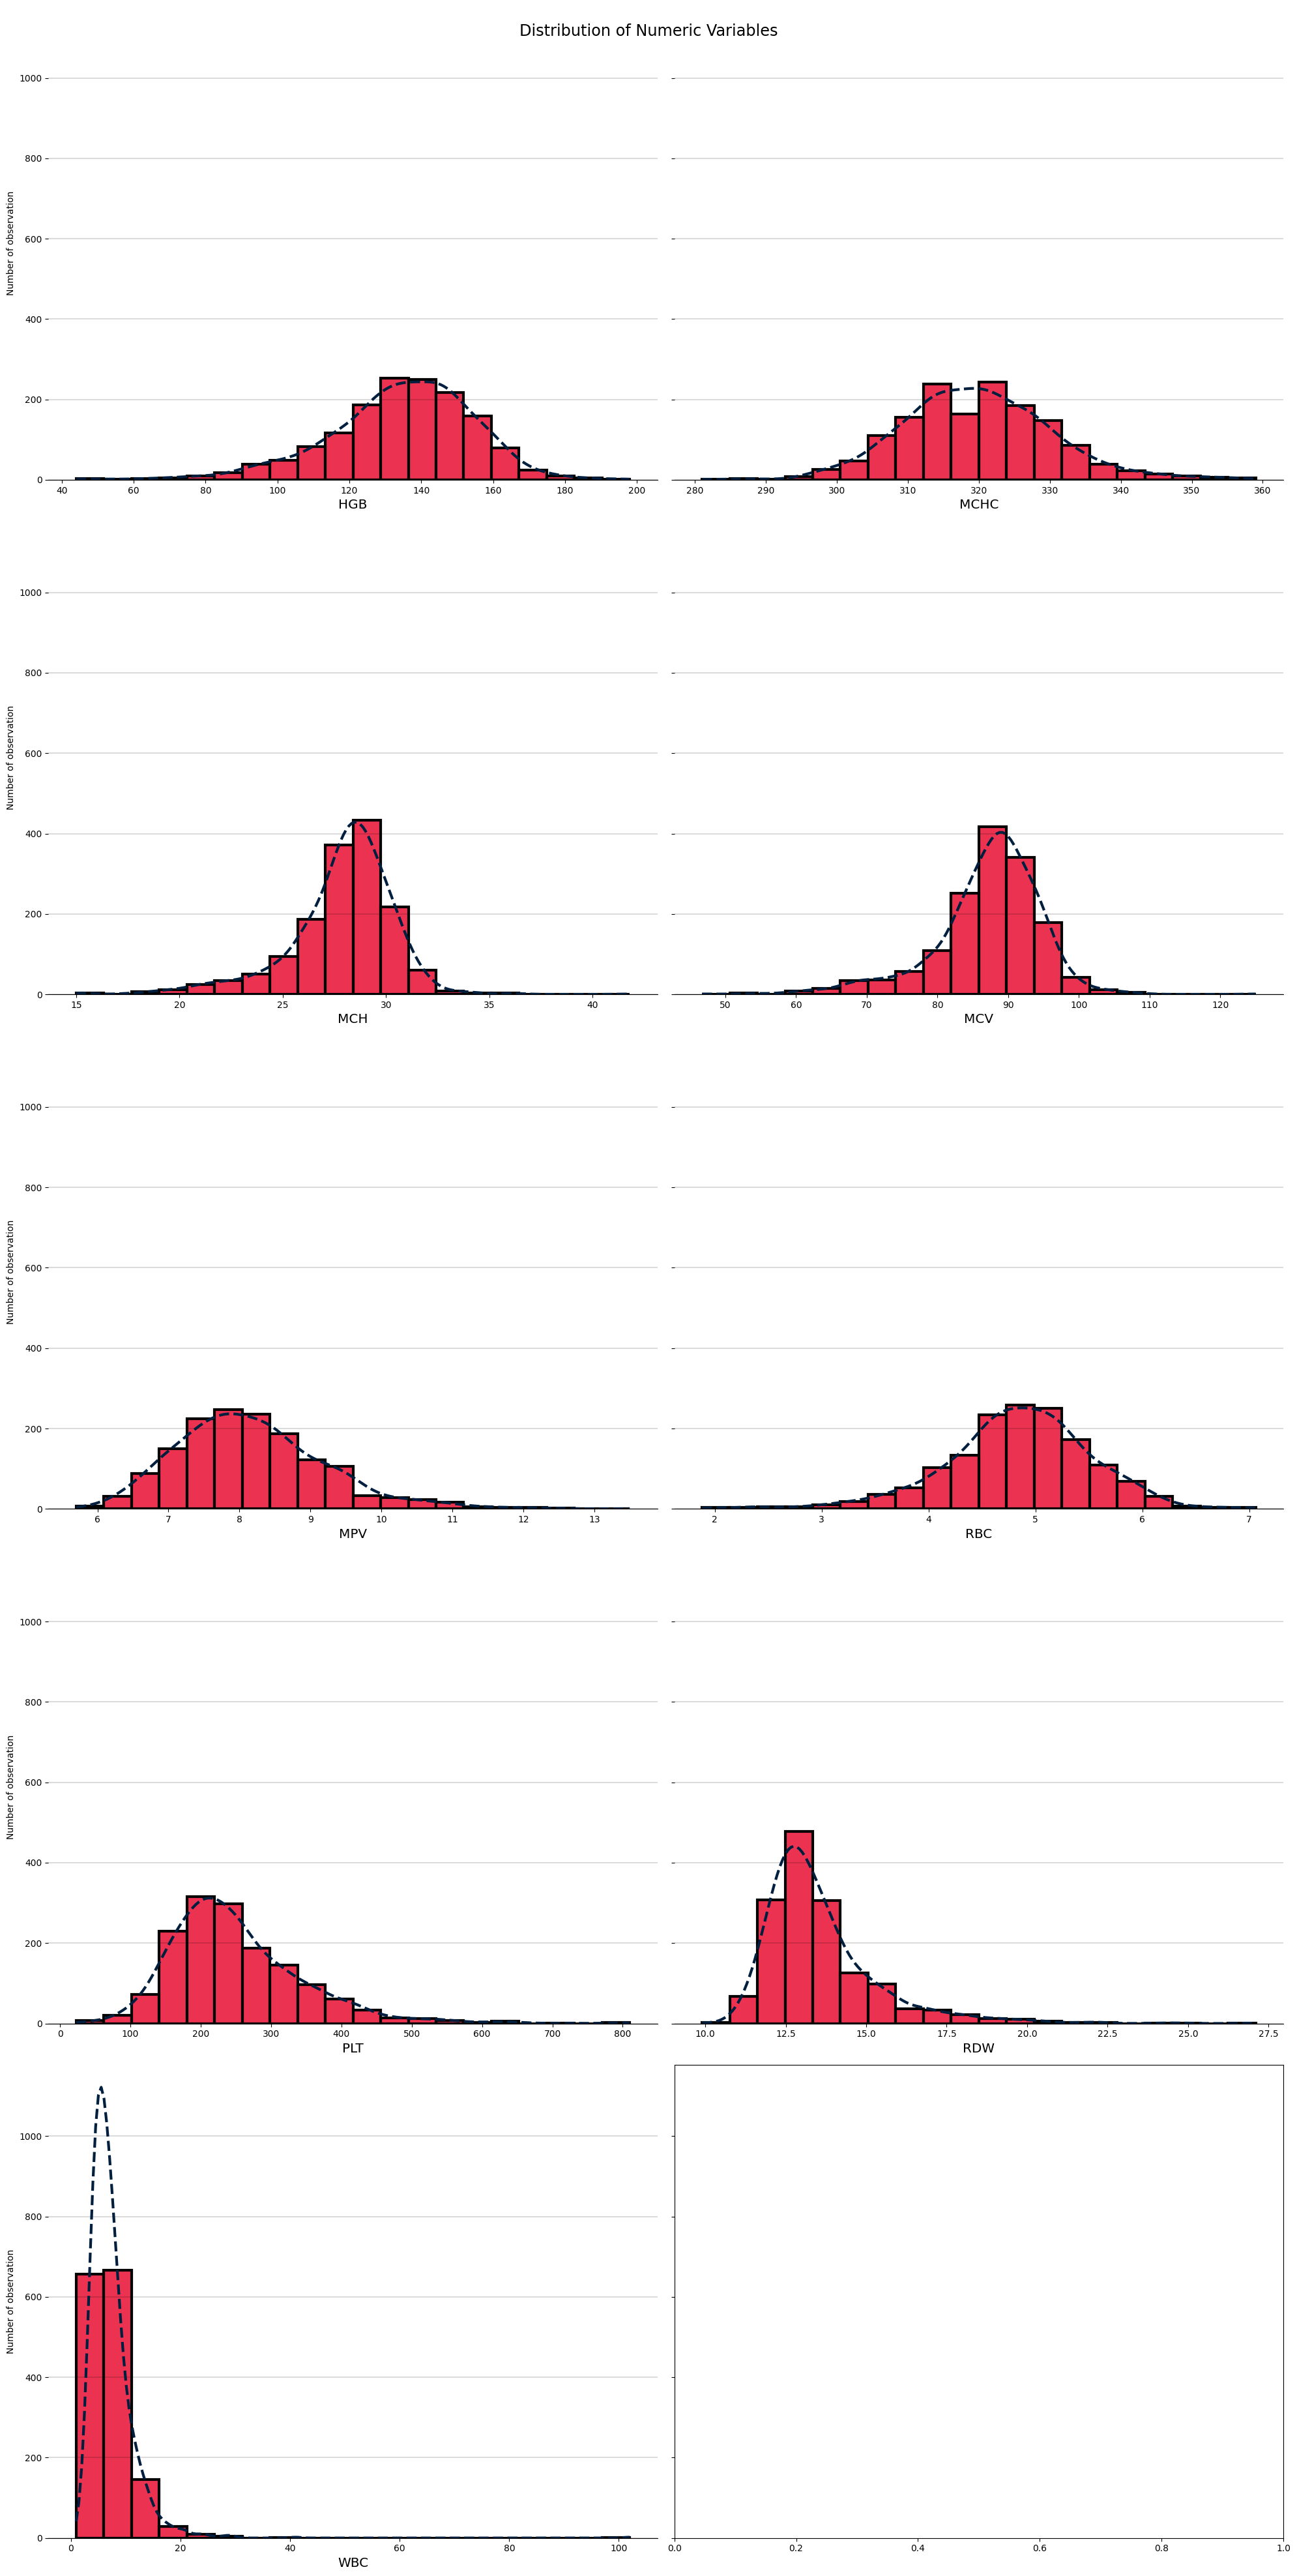

In [8]:
import math
# Select numeric columns
numeric_cols = df.select_dtypes(include='float').columns.tolist()

# Tính toán kích thước lưới dựa trên số lượng cột
num_cols = 9
num_rows = math.ceil(num_cols / 2)

# Tạo figure và axes với kích thước lớn hơn
fig, axs = plt.subplots(num_rows, 2, figsize=(20, num_rows * 8), sharey=True)

# Lặp qua các cột và tạo histogram
for i, col in enumerate(numeric_cols):
    ax = axs[i // 2, i % 2]
    hist(df, col, ax)
    
    # Gỡ bỏ các trục không sử dụng
    if i >= num_cols:
        ax.axis('off')

# Đặt tiêu đề và hiển thị hình ảnh
fig.suptitle("Distribution of Numeric Variables", fontsize="xx-large")
plt.tight_layout()
plt.show()

##### Phân tích tương quan liên quan đến "Kết quả"

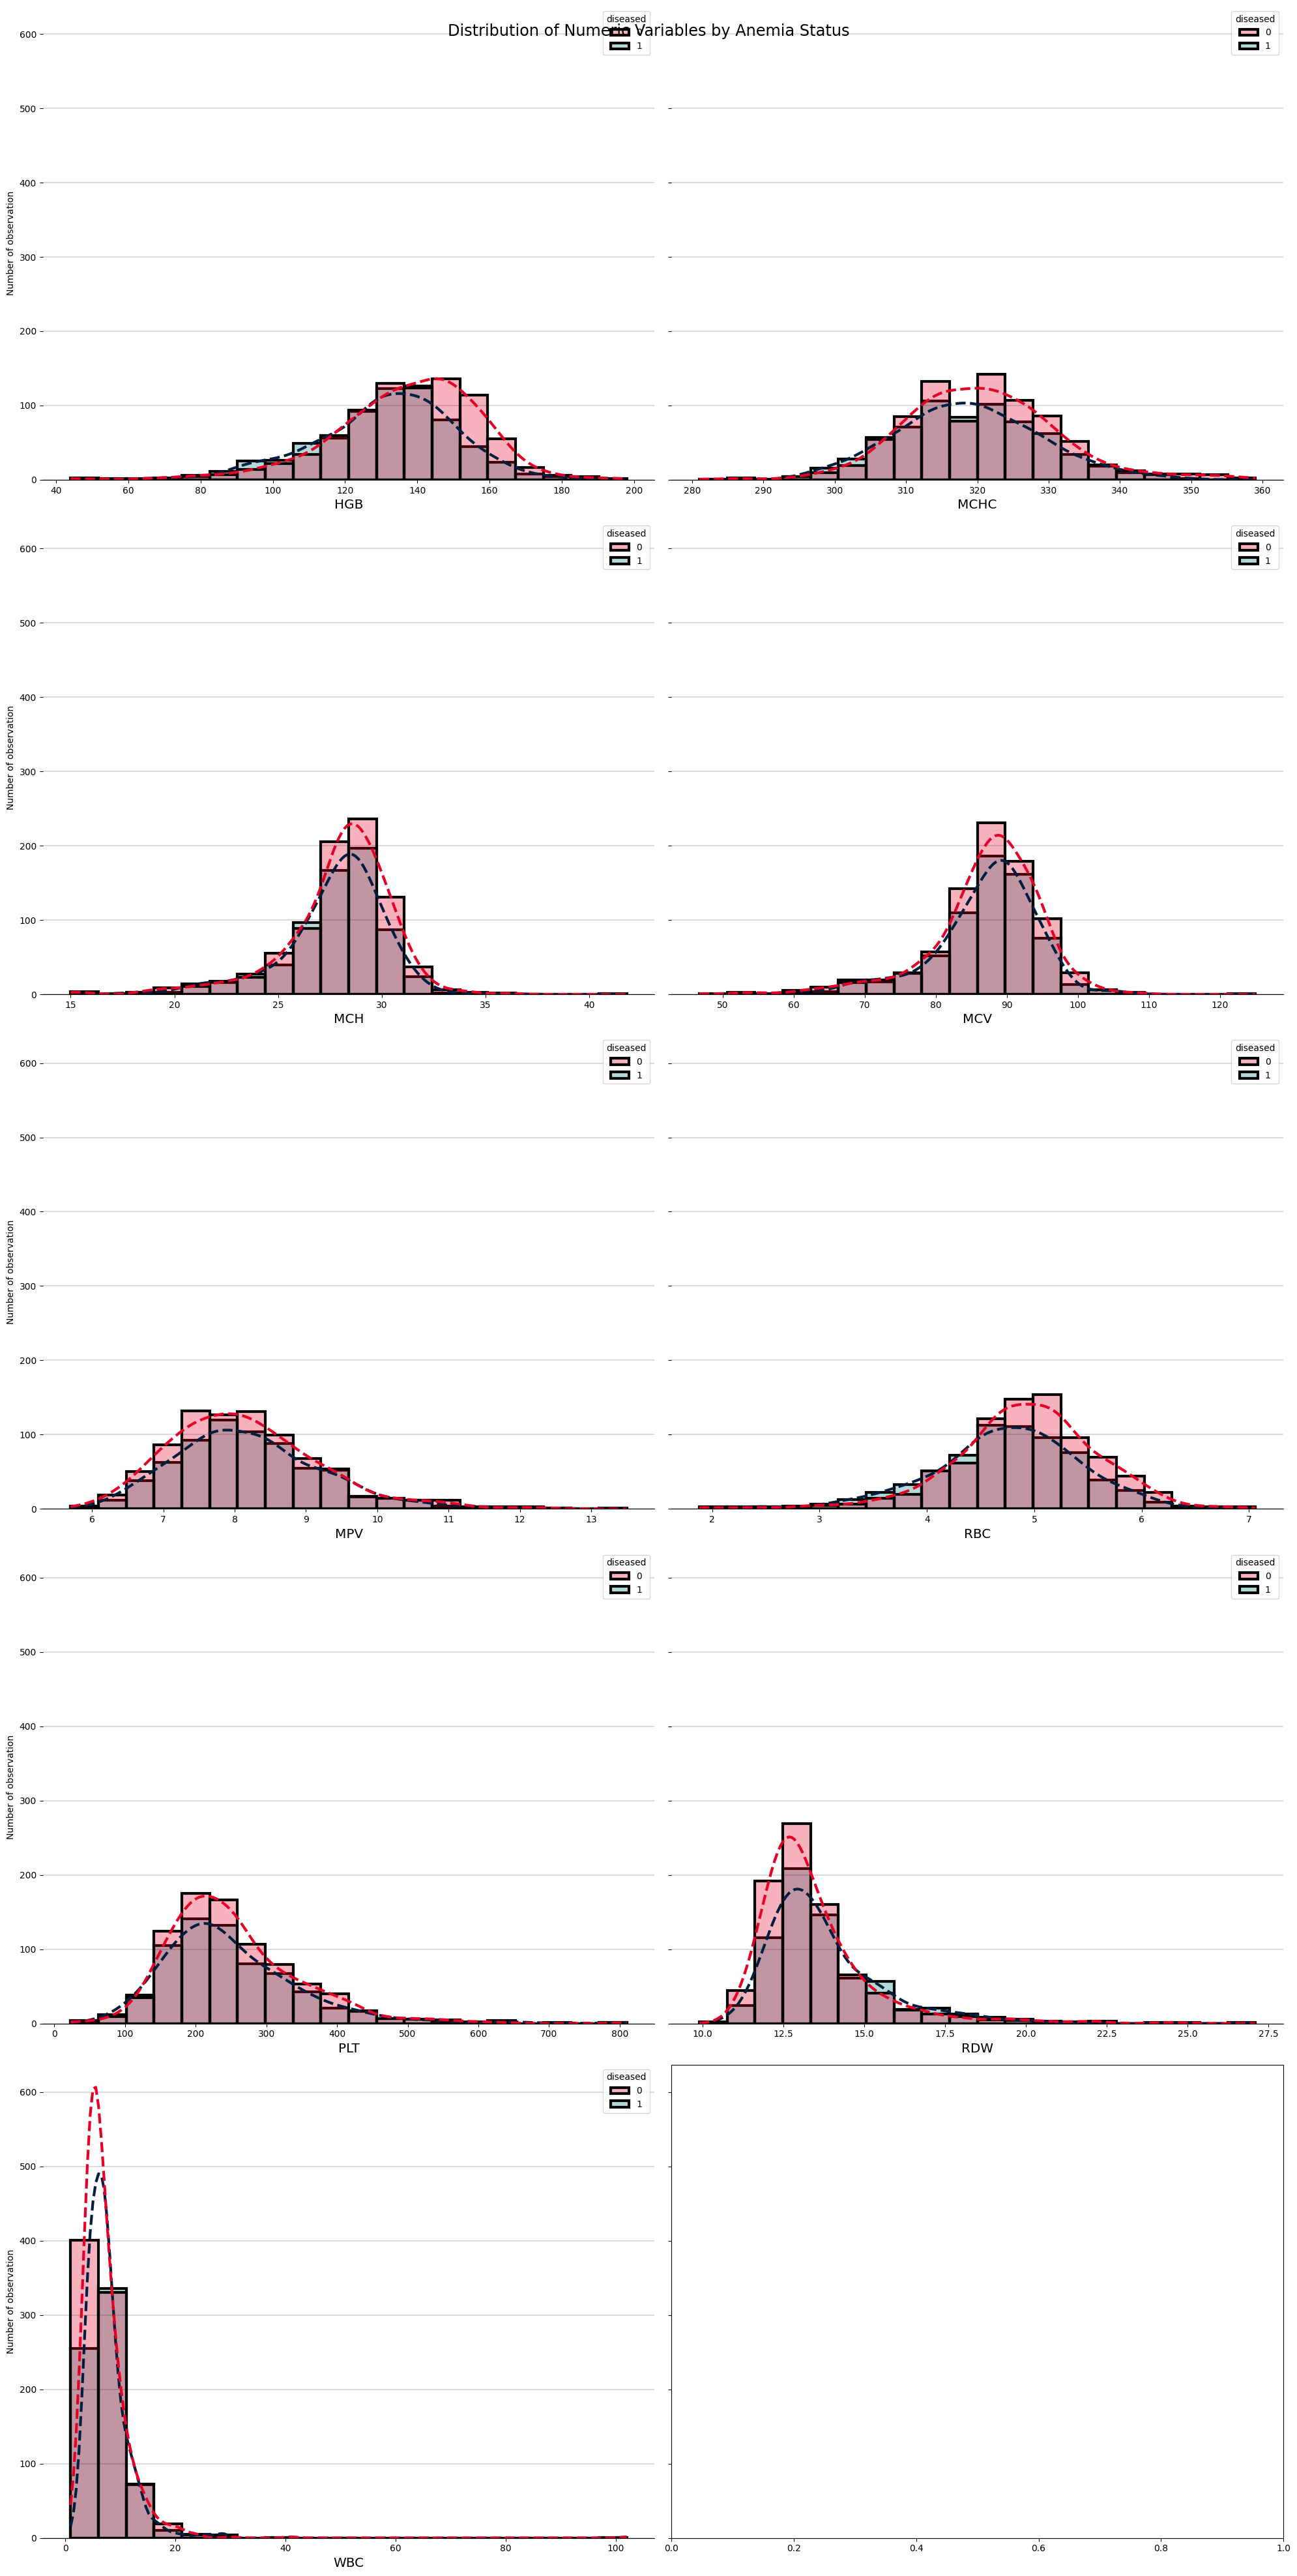

In [9]:
# Create a list of numeric columns
numeric_cols = [col for col in df.columns if df[col].dtype == float]

# Tính toán kích thước lưới dựa trên số lượng cột
num_cols = 9
num_rows = math.ceil(num_cols / 2)

# Tạo figure và axes với kích thước lớn hơn
fig, axs = plt.subplots(num_rows, 2, figsize=(20, num_rows * 8), sharey=True)

# Lặp qua các cột và tạo histogram
for i, col in enumerate(numeric_cols):
    ax = axs[i // 2, i % 2]
    hist(df, col, ax, hue="diseased", palette=[colors[0], colors[2]])
    
    # Gỡ bỏ các trục không sử dụng
    if i >= num_cols:
        ax.axis('off')

# Đặt tiêu đề và hiển thị hình ảnh
fig.suptitle("Distribution of Numeric Variables by Anemia Status", fontsize="xx-large")
plt.tight_layout()
plt.show()

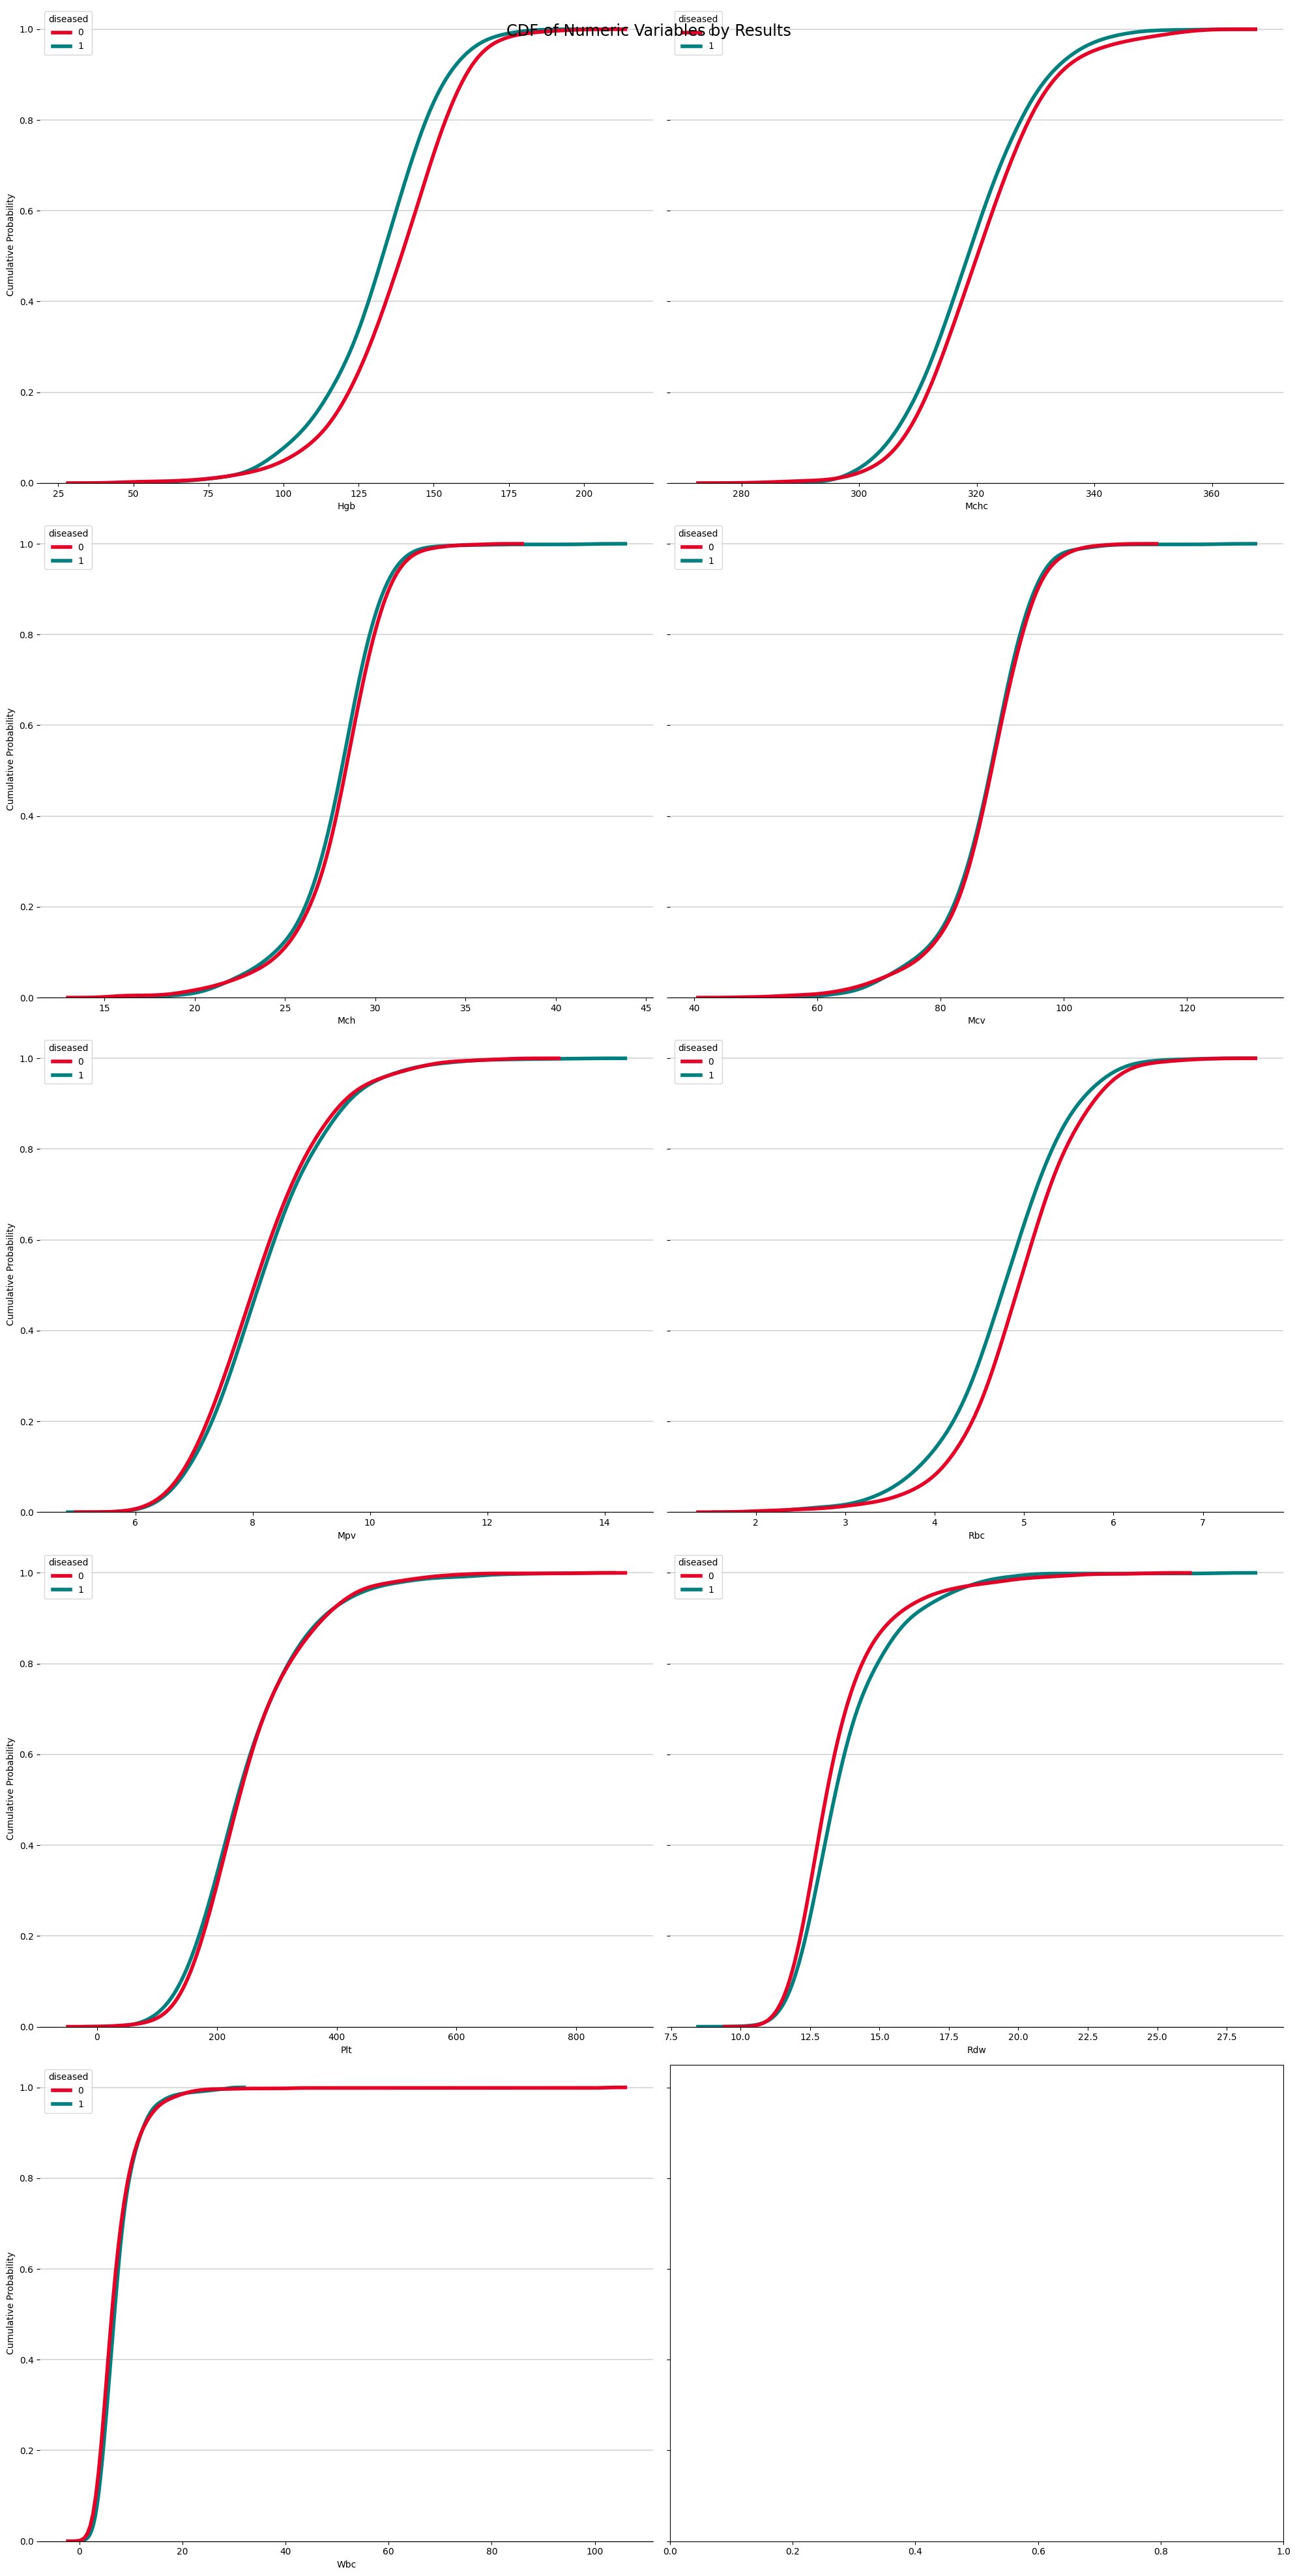

In [10]:
# Tính toán kích thước lưới dựa trên số lượng cột
num_cols = 9
num_rows = math.ceil(num_cols / 2)

# Tạo figure và axes với kích thước lớn hơn
fig, axs = plt.subplots(num_rows, 2, figsize=(20, num_rows * 8), sharey=True)

# Lặp qua từng cột số
for i, col in enumerate(numeric_cols):
    # Lấy trục tương ứng
    ax = axs[i // 2][i % 2]
    
    # Vẽ biểu đồ CDF với Kết quả là màu sắc
    cdf_plot(df, col, ax, hue="diseased", palette=[colors[0], colors[2]])
    
    # Thêm nhãn vào trục
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Cumulative Probability")
    
# Thêm tiêu đề vào hình
fig.suptitle("CDF of Numeric Variables by Results", fontsize="xx-large")

# Điều chỉnh khoảng cách giữa các ô phụ
fig.tight_layout()

# Hiển thị hình
plt.show()

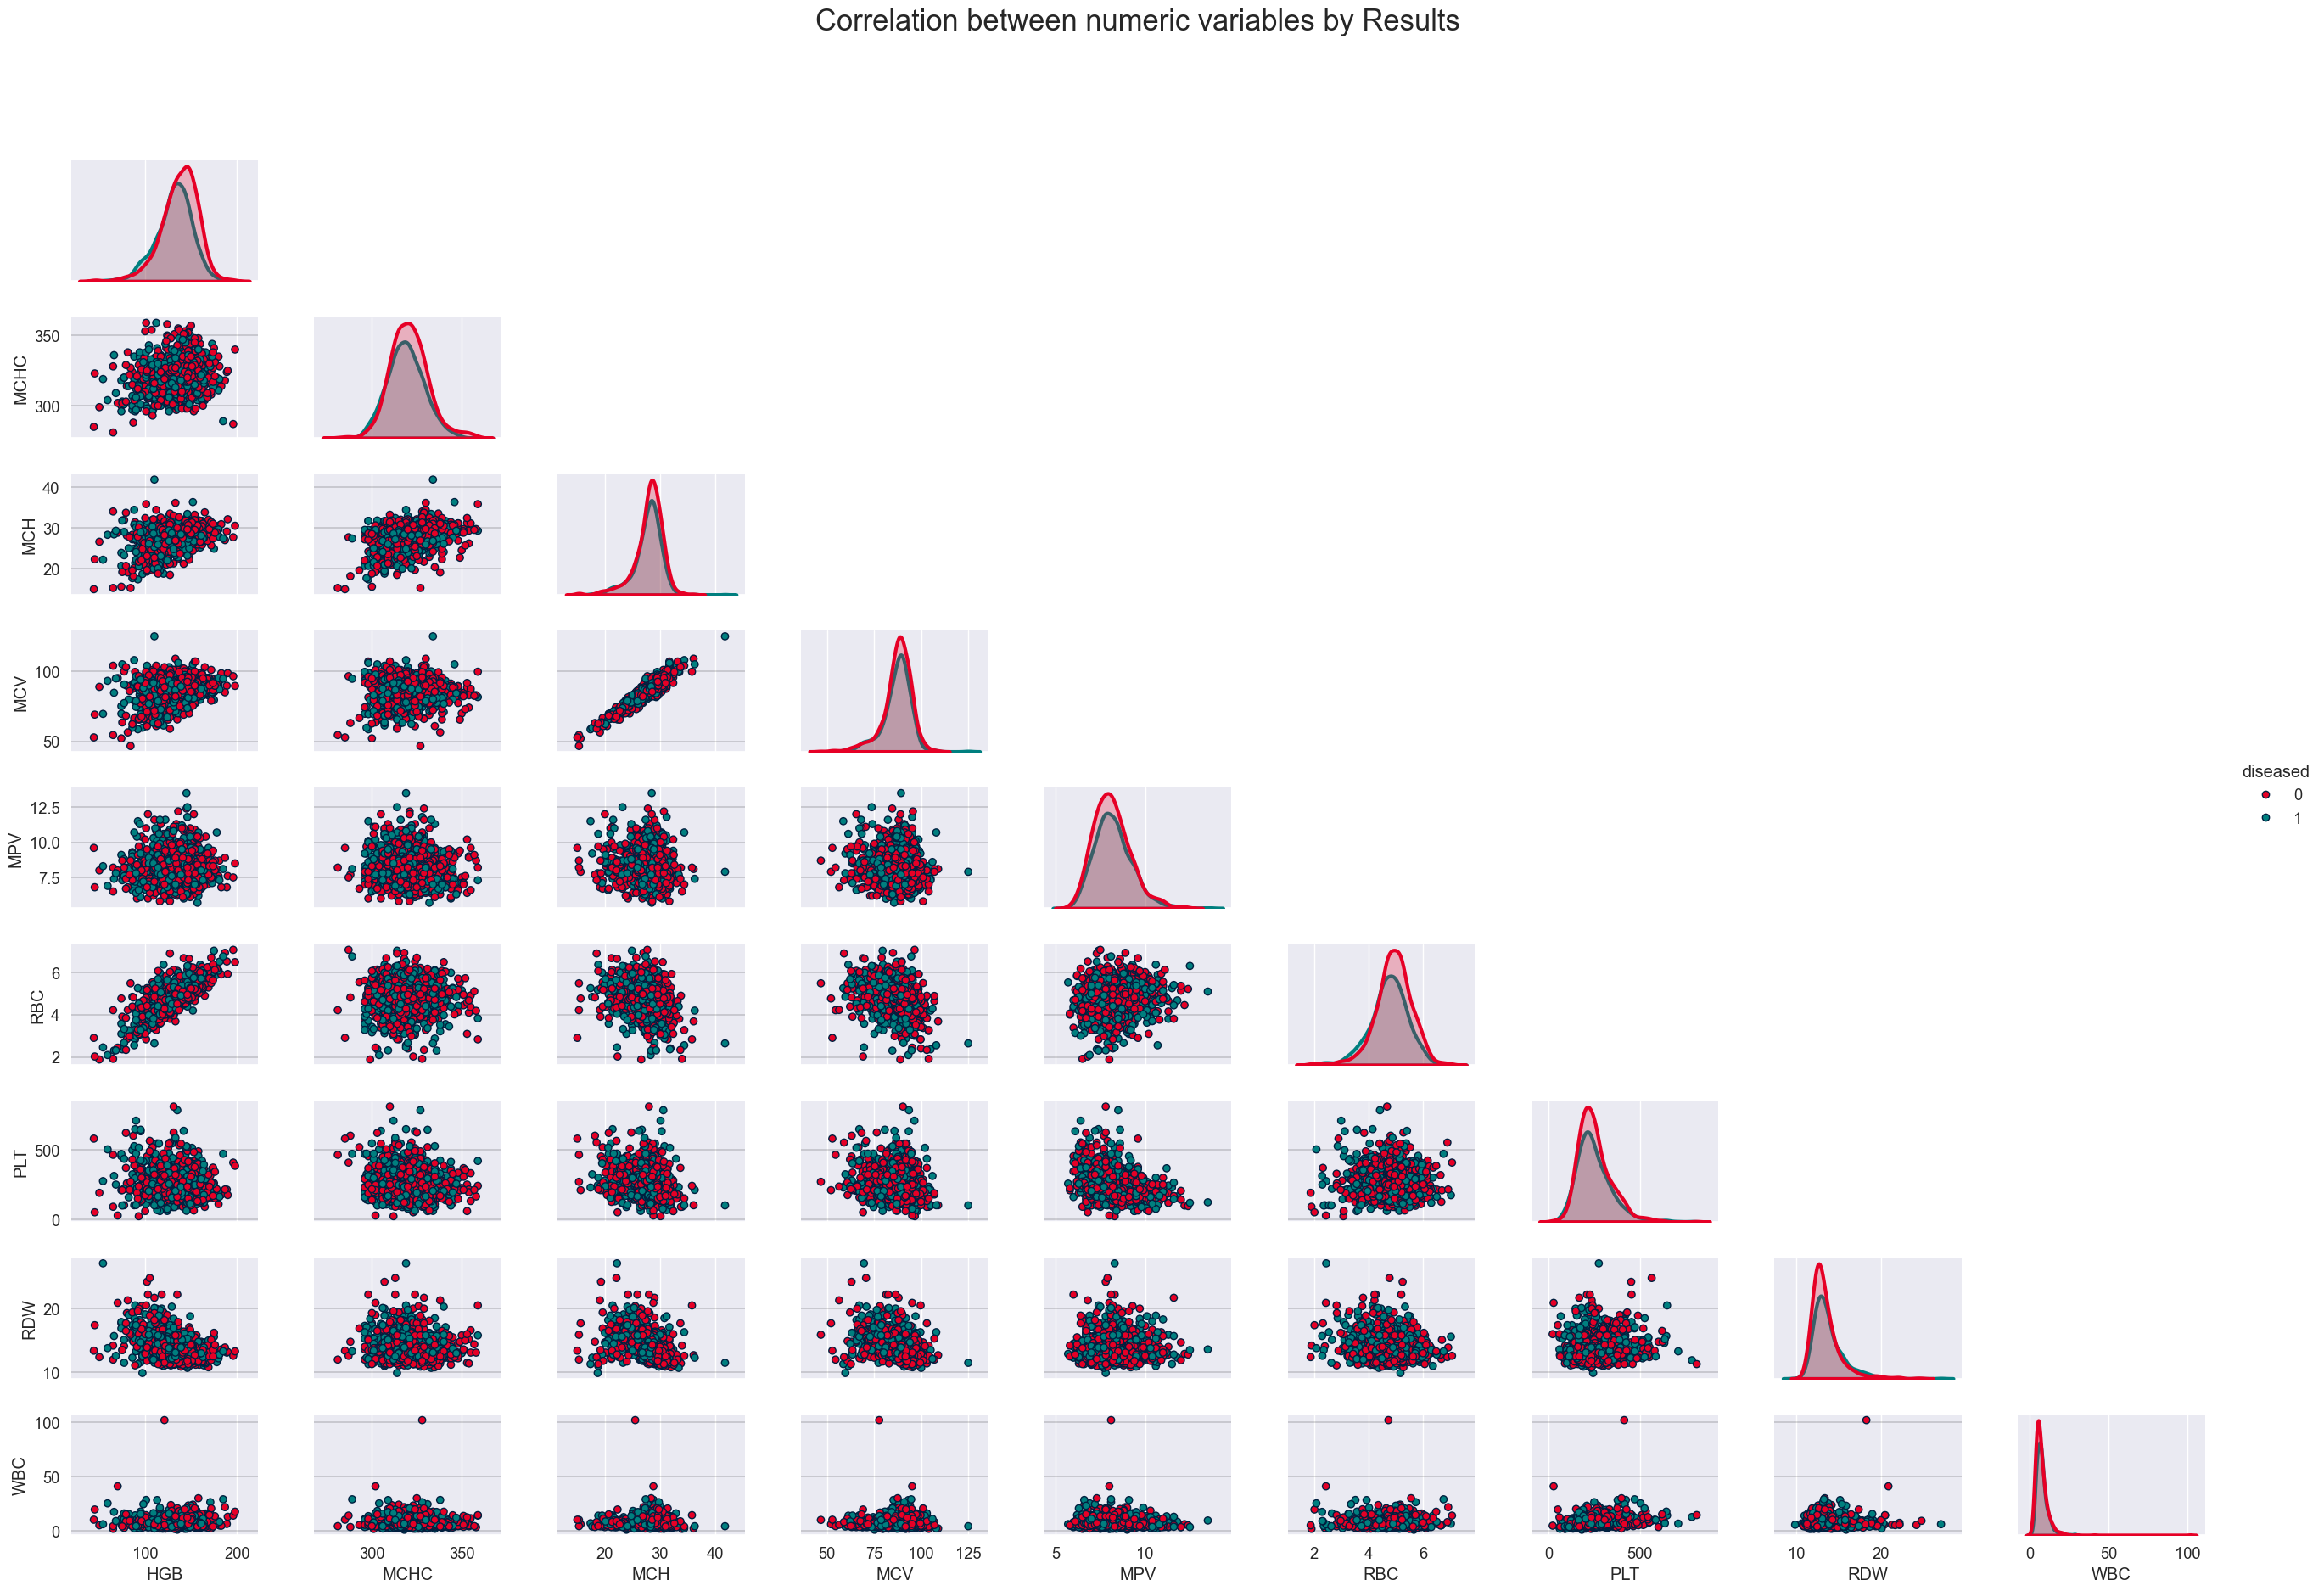

In [11]:
sns.set(font_scale=1.2)

g = sns.pairplot(data=df, hue="diseased", palette=[colors[0], colors[2]], 
             corner=True, plot_kws={"linewidth":1, "edgecolor":colors[1]},
             diag_kws={"linewidth":3},
             height=2, aspect=1.5)

# Đặt kiểu cho từng ô phụ
for axs in g.axes:
    for ax in axs:
        if ax:
            set_style(ax)

# Đặt tiêu đề cho hình
g.fig.suptitle("Correlation between numeric variables by Results", fontsize="xx-large", y=1.05)

# Điều chỉnh khoảng cách giữa các ô phụ
g.fig.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.3, wspace=0.3)

plt.show()

#### Mô hình và dự đoán

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [13]:
from sklearn.model_selection import train_test_split

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X = df.drop("diseased", axis=1)
y = df["diseased"]

random_seed = 15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, stratify=y, random_state=random_seed)

In [14]:
SEED = 42  # hoặc bất kỳ giá trị nào khác mà bạn chọn

models = {
    "LogisticRegression": LogisticRegression(random_state=SEED, max_iter=1000),
    "Knn": KNeighborsClassifier(),
    "S.V.C.": SVC(random_state=SEED),
    "RandomForestClassifier": RandomForestClassifier(random_state=SEED),
}
file_model_names = {
    "LogisticRegression": "model_logistic_regression",
    "Knn": "model_knn",
    "S.V.C.": "model_svc",
    "RandomForestClassifier": "model_random_forest_classifier"
}

In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score
import joblib
import os

output_directory = os.path.join("..", "models", "diabetes") # Đường dẫn đến thư mục đích

# Tạo danh sách trống để lưu trữ số liệu hiệu suất
models_list = []
train_acc_list = []
test_acc_list = []
train_auc_list = []
test_auc_list = []

# Lặp lại tất cả các mô hình và thêm số liệu hiệu suất của chúng vào danh sách
for name in models.keys():
    model = models[name]
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    models_list.append(name)
    train_acc_list.append(round(accuracy_train,2))
    test_acc_list.append(round(accuracy_test,2))

    # Lưu mô hình vào thư mục đích
    filename = file_model_names[name] + ".sav"  # Sử dụng tên file tương ứng từ biến file_model_names
    filepath = os.path.join(output_directory, filename)
    os.makedirs(output_directory, exist_ok=True)
    joblib.dump(model, filepath)

# Tạo một khung dữ liệu để lưu trữ các số liệu hiệu suất
results_df = pd.DataFrame({
    'Model': models_list,
    'Train Accuracy': train_acc_list,
    'Test Accuracy': test_acc_list
})

# Hiển thị dataframe
print(results_df)

                    Model  Train Accuracy  Test Accuracy
0      LogisticRegression            0.60           0.57
1                     Knn            0.71           0.53
2                  S.V.C.            0.55           0.55
3  RandomForestClassifier            1.00           0.57


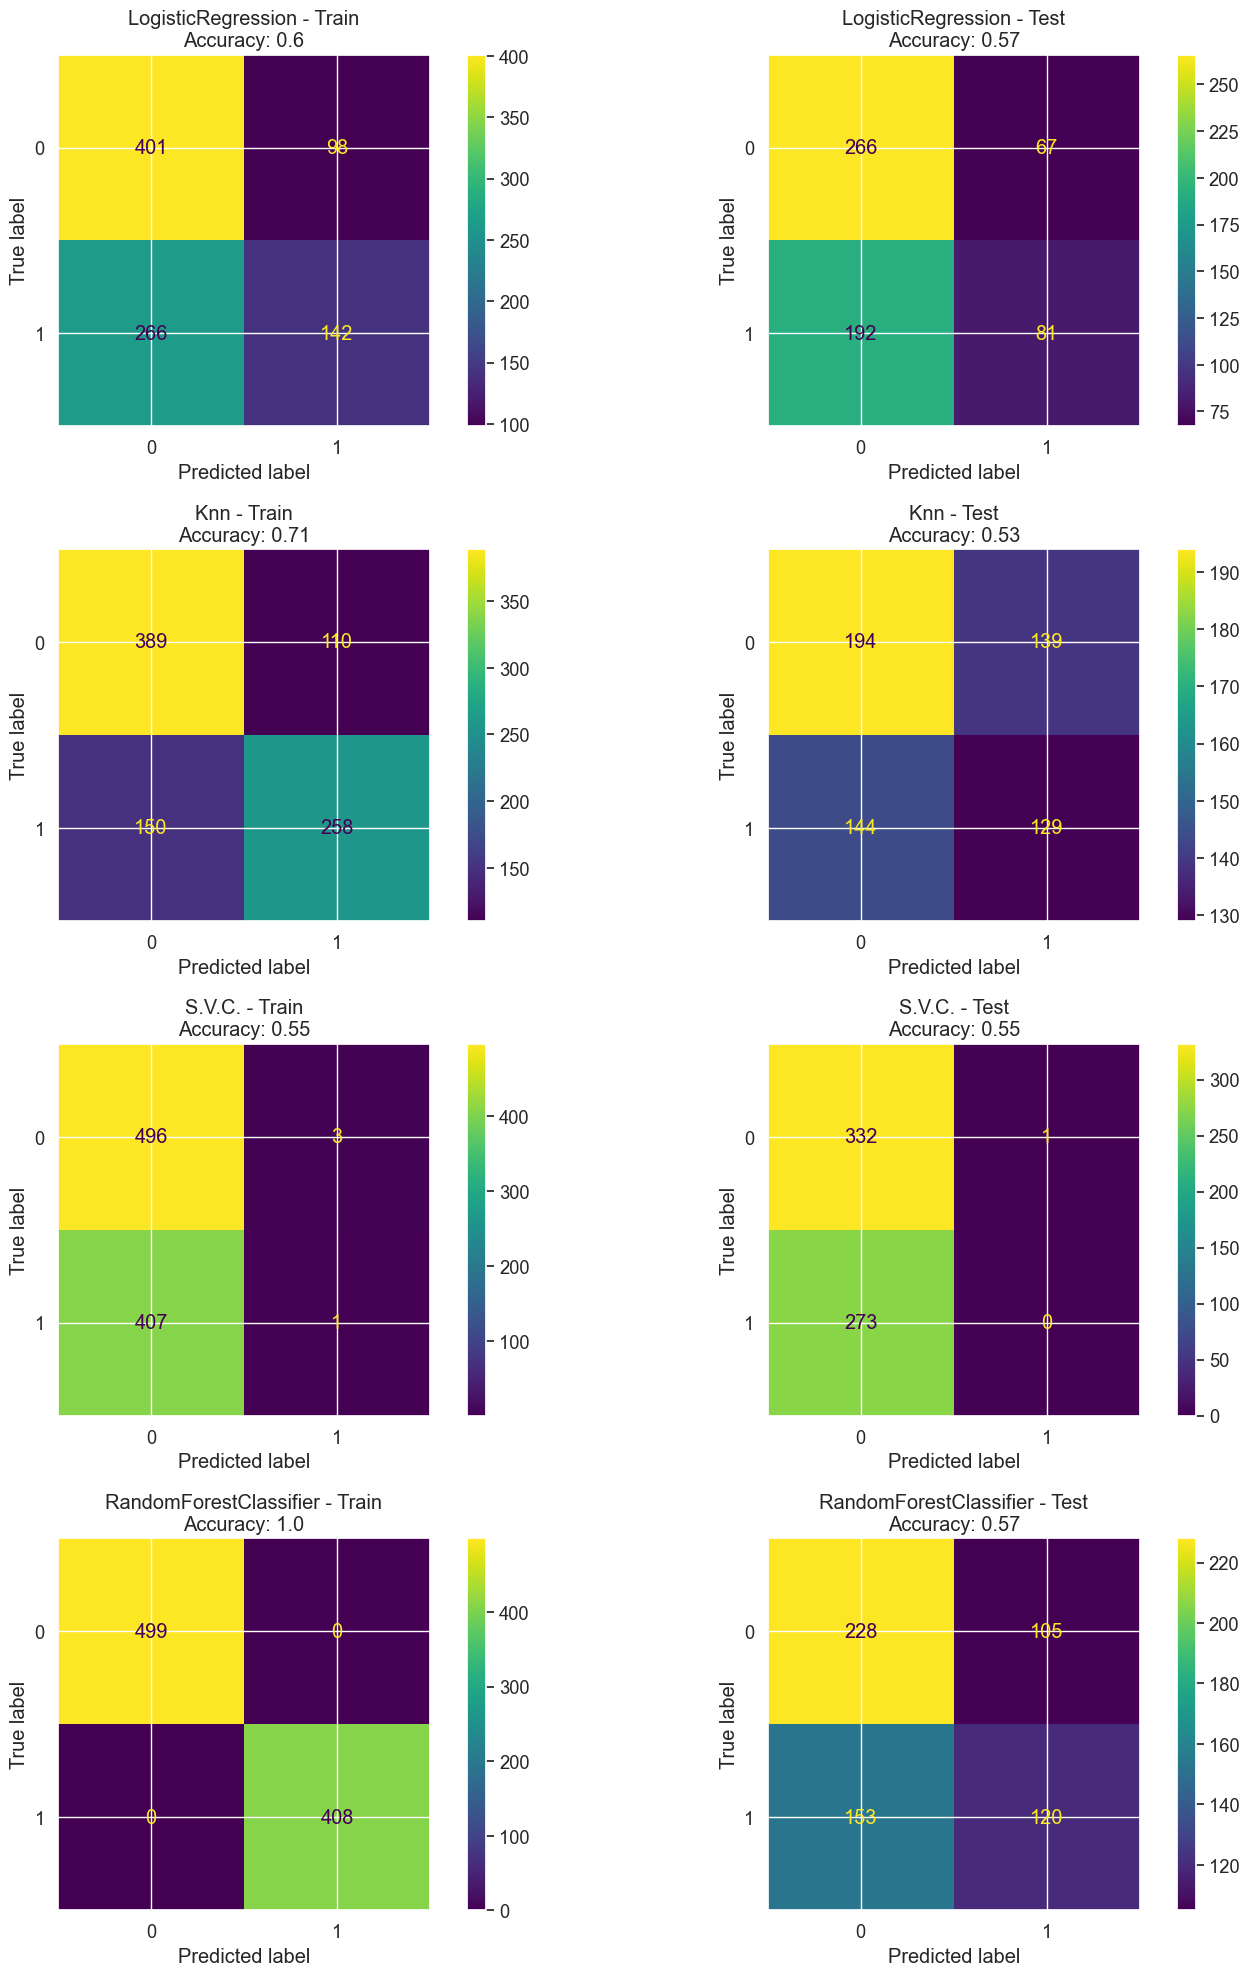

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(nrows=len(models), ncols=2, figsize=(15, 20))

for i, name in enumerate(models.keys()):
    model = models[name]
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    ConfusionMatrixDisplay(cm_train).plot(ax=axes[i, 0], values_format='d')
    ConfusionMatrixDisplay(cm_test).plot(ax=axes[i, 1], values_format='d')
    
    axes[i, 0].set_title(f"{name} - Train\nAccuracy: {round(accuracy_train,2)}")
    axes[i, 1].set_title(f"{name} - Test\nAccuracy: {round(accuracy_test,2)}")
    
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score

for name in models.keys():
    model = models[name]
    
    # Thực hiện xác thực chéo 5 lần
    scores = cross_val_score(model, X, y, cv=5)
    
    print("--"*10, f" {name} ", "--"*10)
    print(f"\nCross-validation scores: {scores}")
    print(f"Mean score: {scores.mean()}")

--------------------  LogisticRegression  --------------------

Cross-validation scores: [0.56765677 0.60066007 0.59075908 0.58278146 0.57284768]
Mean score: 0.5829410093327214
--------------------  Knn  --------------------

Cross-validation scores: [0.51815182 0.51815182 0.51155116 0.52649007 0.50662252]
Mean score: 0.516193473652001
--------------------  S.V.C.  --------------------

Cross-validation scores: [0.53465347 0.54785479 0.55115512 0.54966887 0.54635762]
Mean score: 0.5459379712805718
--------------------  RandomForestClassifier  --------------------

Cross-validation scores: [0.55445545 0.56435644 0.58745875 0.59933775 0.5397351 ]
Mean score: 0.5690686949489651


#### Tầm quan trọng của các chỉ số

Hãy tiến hành phân tích tầm quan trọng về đặc điểm của mô hình hoạt động tốt nhất để xác định biến nào có tác động đáng kể nhất đến dự đoán và tỷ lệ chúng ảnh hưởng đến kết quả.

In [18]:
model = RandomForestClassifier(random_state=SEED)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

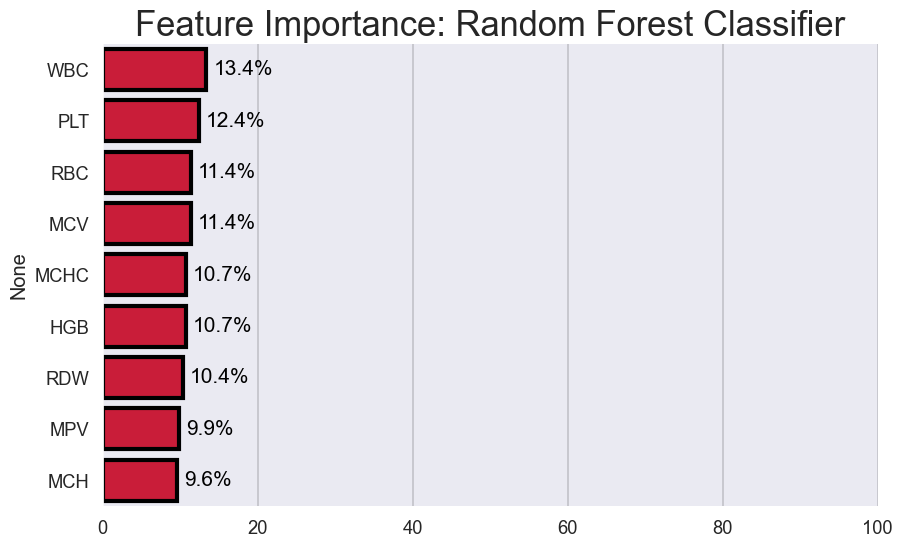

In [19]:
feature_importance = pd.Series(data=model.feature_importances_, index=X.columns).sort_values(ascending=False) * 100

feature_importance = feature_importance.round(1)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(y=feature_importance.index, x=feature_importance.values, ax=ax, color=colors[0], linewidth=3, edgecolor="black")
ax.bar_label(ax.containers[0], color="black", fontsize=15, padding=5, fmt='%g%%')

set_style(ax, left=False, bottom=True, axis_grid="x")

ax.set_title("Feature Importance: Random Forest Classifier", fontsize="xx-large")
ax.set_xlim([0, 100])

plt.show()

In [20]:
"""
import joblib
model = joblib.load('path/to/model.sav')
X_new = ...  # Dữ liệu mới cần dự đoán
y_pred = model.predict(X_new)

"""

"\nimport joblib\nmodel = joblib.load('path/to/model.sav')\nX_new = ...  # Dữ liệu mới cần dự đoán\ny_pred = model.predict(X_new)\n\n"